**Load and Inspect the Data**

First, we'll load the datasets into Pandas and inspect them to understand the structure.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the training dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the datasets
print(train_data.head())
print(test_data.head())

# Get basic info of the datasets
print(train_data.info())
print(test_data.info())


      Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1  
      id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16501   70    1   0       163   495    0        2      170      1      2.0   
1  10444   61    1   0       131   238    0        2       74      1      4.9   
2  14288   53    1   0        95   558    1        1       73      1      0.7   
3  10409   37  

**Data Exploration**

We'll check for any missing values, basic statistics, and overall structure.

Check for Missing Values

In [3]:
# Checking for missing values in train and test data
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


**Descriptive Statistics**

In [4]:
# Get summary statistics for numerical columns
print(train_data.describe())

                 Id          Age          Sex           cp     trestbps  \
count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
std     2886.026080    14.185970     0.500034     1.115594    31.099538   
min    10001.000000    29.000000     0.000000     0.000000    94.000000   
25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
max    19998.000000    77.000000     1.000000     3.000000   200.000000   

              chol          fbs      restecg      thalach        exang  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean    342.805970     0.493085     1.013008   136.506093     0.503218   
std     127.291998     0.499986     0.815806    38.141966     0.500024   
min     126.000000     0.000

**Visualize Target Distribution**

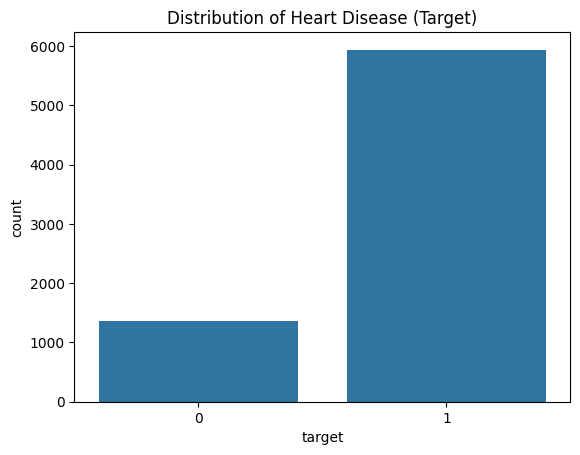

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Heart Disease (Target)')
plt.show()

**Feature Analysis and Correlation**

Let's examine how features correlate with the target and identify important relationships.

Correlation Heatmap

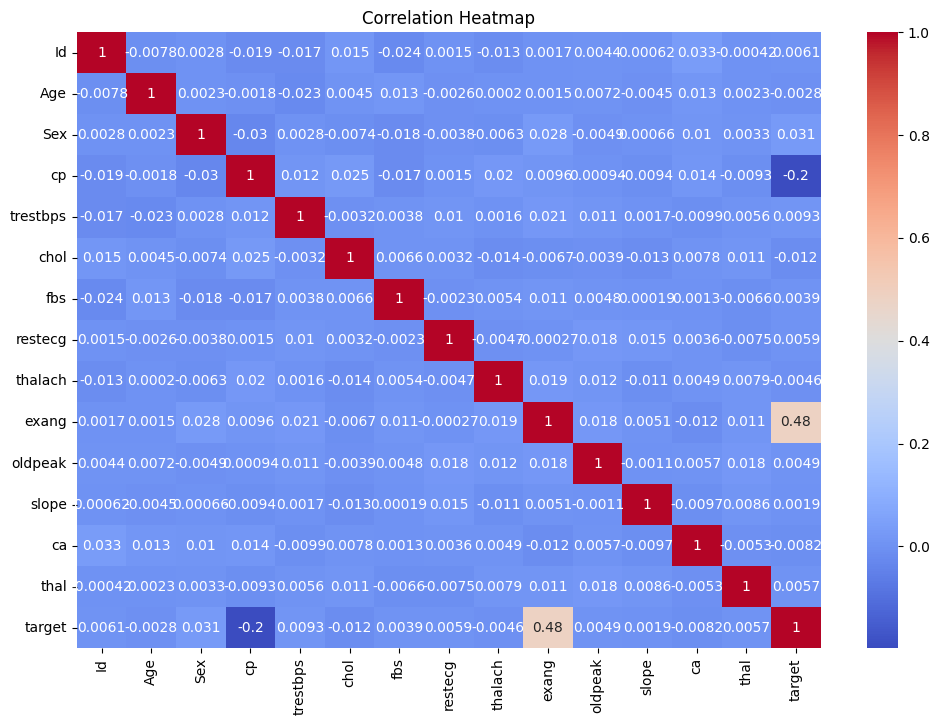

In [6]:
# Generate a heatmap to see correlations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Distribution of Key Features**

You can visualize the distribution of important features like age, chol, thalach, and trestbps to understand how they are distributed between people with and without heart disease.

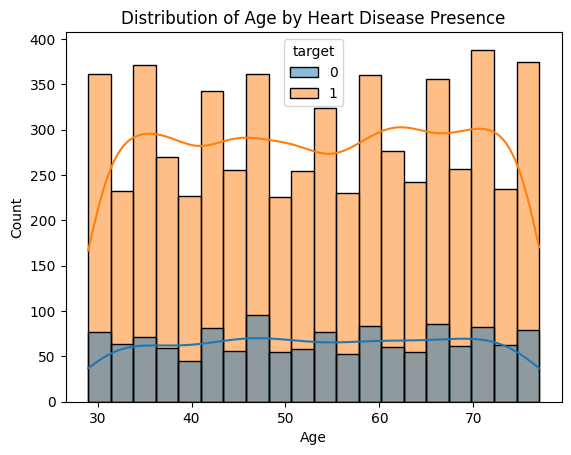

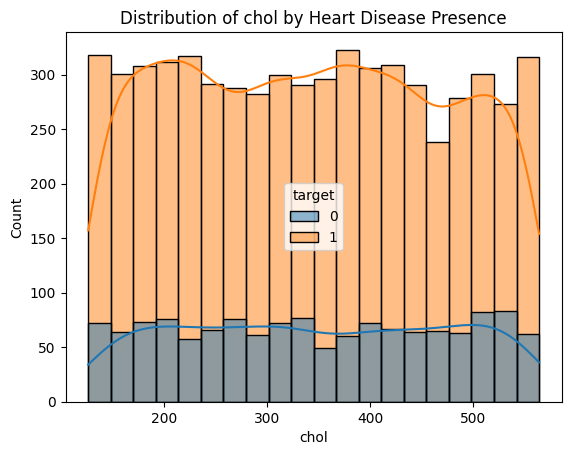

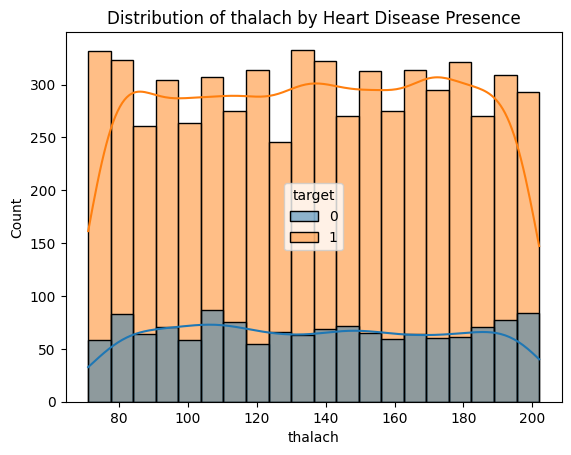

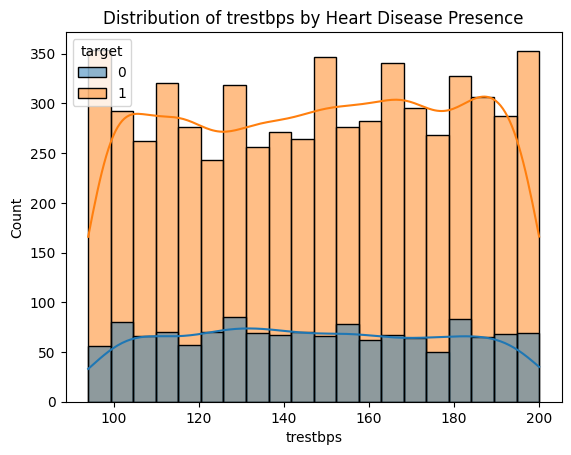

In [8]:
# Visualize key features based on target
features = ['Age', 'chol', 'thalach', 'trestbps']
for feature in features:
    sns.histplot(data=train_data, x=feature, hue='target', kde=True)
    plt.title(f'Distribution of {feature} by Heart Disease Presence')
    plt.show()

**Address Class Imbalance**

Since the target variable is imbalanced, we can use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

In [15]:
from imblearn.over_sampling import SMOTE

X = train_data.drop(columns=["Id", "target"])  # Features
y = train_data["target"]                      # Target variable

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())

target
1    5941
0    5941
Name: count, dtype: int64


In [14]:
# Assuming train_data is already loaded as a pandas DataFrame
train_data.rename(columns={'Sex': 'sex', 'Age': 'age'}, inplace=True)

# Display the first few rows to verify the change
train_data.head()

,Id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


 **Feature Scaling**

In [16]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
test_data_scaled = scaler.transform(test_data.drop(columns=["id"]))

**Model Building**

Split the Resampled Data

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


**Choose the Model**

We'll start with a Random Forest Classifier, which is robust and effective for binary classification problems.

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

Evaluate on Validation Data

Accuracy on validation set: 0.8960875052587295
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1189
           1       0.96      0.83      0.89      1188

    accuracy                           0.90      2377
   macro avg       0.90      0.90      0.90      2377
weighted avg       0.90      0.90      0.90      2377



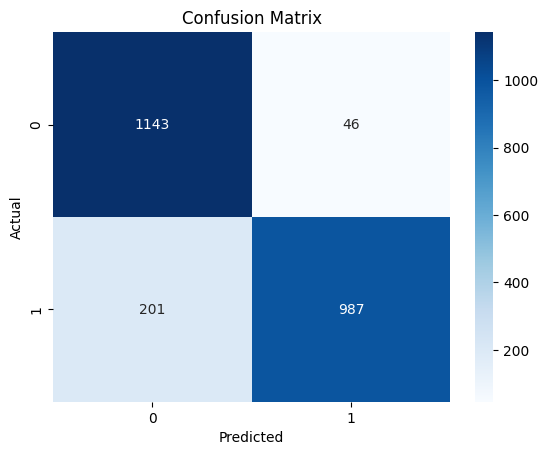

In [20]:
y_pred_valid = model.predict(X_valid)
print("Accuracy on validation set:", accuracy_score(y_valid, y_pred_valid))
print("Classification Report:\n", classification_report(y_valid, y_pred_valid))

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred_valid)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Evaluate on Training Data (to check for overfitting)**

In [23]:
y_pred_train = model.predict(X_train)
print("Accuracy on training set:", accuracy_score(y_train, y_pred_train))

Accuracy on training set: 0.9998947922146239


**Predictions on Test Data**

In [25]:
test_predictions = model.predict(test_data_scaled)
submission = pd.DataFrame({"Id": test_data["id"], "Target": test_predictions})
submission.to_csv("submission.csv", index=False)

**Feature Importance Analysis**

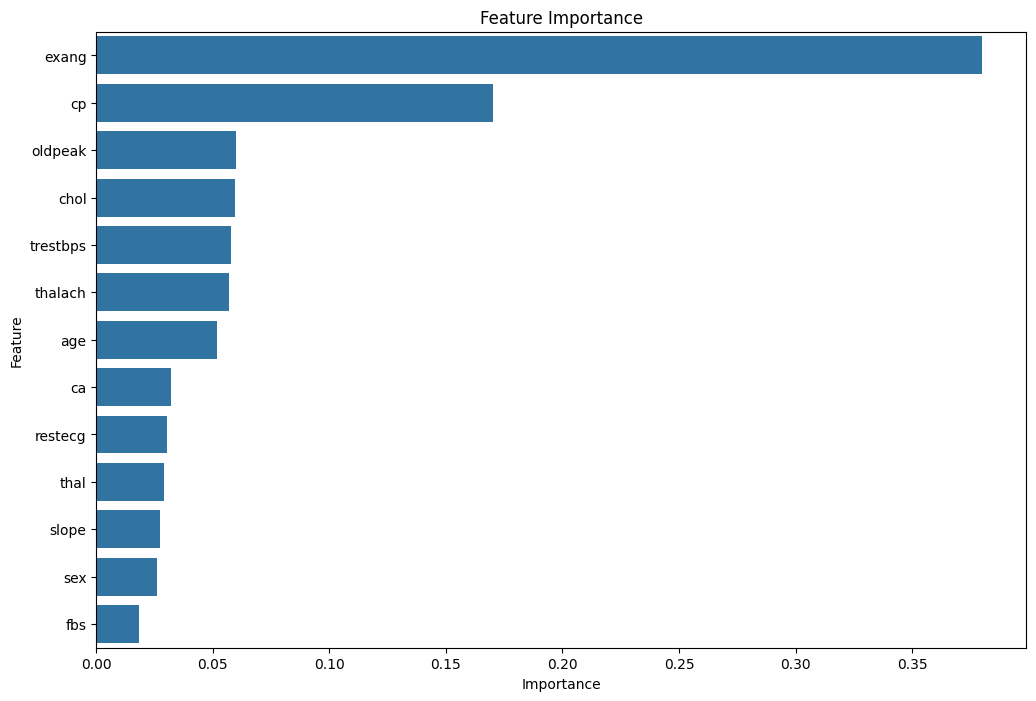

In [26]:
importances = model.feature_importances_
feature_names = X.columns

# Visualize feature importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()